<a href="https://colab.research.google.com/github/datecru/flightdataanomaly/blob/main/Anomaly_Detection_on_Flight_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install libraries

In [1]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install seaborn

#Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

upload dataset https://www.kaggle.com/datasets/mahoora00135/flights?resource=download

In [3]:
from google.colab import files
uploaded = files.upload()

Saving flights.csv to flights.csv


# Load dataset using pandas

show first line of the dataframe

In [4]:
df = pd.read_csv('flights.csv')

df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


show dataframe info

show dataframe stats

In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


#made a histogram to show the array delay

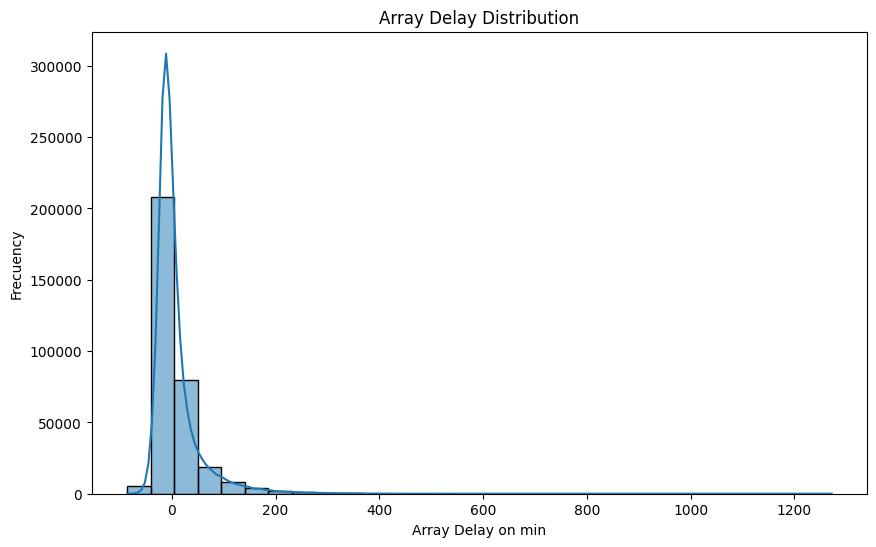

In [6]:
plt.figure(figsize =(10, 6))
sns.histplot(df['arr_delay'], bins=30, kde = True)
plt.title('Array Delay Distribution')
plt.xlabel('Array Delay on min')
plt.ylabel('Frecuency')
plt.show()

look for the available features

In [7]:
print(df.columns)

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')


#pick related data to the analysis and normalize de data

select the new columns and delete de previus columns

show the new Dataframe

In [8]:
features = ['month', 'origin', 'dest', 'arr_delay', 'dep_delay', 'distance', 'air_time']
df_selected = df[features].dropna()
df_selected.head()

,month,origin,dest,arr_delay,dep_delay,distance,air_time
0,1,EWR,IAH,11.0,2.0,1400,227.0
1,1,LGA,IAH,20.0,4.0,1416,227.0
2,1,JFK,MIA,33.0,2.0,1089,160.0
3,1,JFK,BQN,-18.0,-1.0,1576,183.0
4,1,LGA,ATL,-25.0,-6.0,762,116.0


# encode one-hot for the columns origin and dest to made as numbers instead of names and verify

In [9]:
df_encoded = pd.get_dummies(df_selected, columns = ['origin', 'dest'])

df_encoded.head()

,month,arr_delay,dep_delay,distance,air_time,origin_EWR,origin_JFK,origin_LGA,dest_ABQ,dest_ACK,...,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA
0,1,11.0,2.0,1400,227.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,20.0,4.0,1416,227.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,33.0,2.0,1089,160.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,-18.0,-1.0,1576,183.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,-25.0,-6.0,762,116.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#convert the dataframe to a tensorflow only numeric columns

calculate the mean and standard deviation

normalize the data

In [10]:
numeric_features = ['arr_delay', 'dep_delay', 'distance', 'air_time', 'month']

data_tensor = tf.constant(df_encoded[numeric_features].values, dtype=tf.float32)

mean = tf.reduce_mean(data_tensor, axis = 0)
std_dev = tf.math.reduce_std(data_tensor, axis = 0)

normalized_data = (data_tensor - mean) / std_dev

Print the data to check if its run well

In [11]:
print("Original data:\n", data_tensor)
print("\nMean by columns:\n", mean.numpy())
print("\nStandard Deviation by column:\n", std_dev.numpy())
print("\nNormalized Data:\n", normalized_data.numpy())

Original data:
 tf.Tensor(
[[ 1.100e+01  2.000e+00  1.400e+03  2.270e+02  1.000e+00]
 [ 2.000e+01  4.000e+00  1.416e+03  2.270e+02  1.000e+00]
 [ 3.300e+01  2.000e+00  1.089e+03  1.600e+02  1.000e+00]
 ...
 [-1.600e+01 -5.000e+00  2.640e+02  4.700e+01  9.000e+00]
 [ 1.000e+00  1.200e+01  1.870e+02  3.300e+01  9.000e+00]
 [-2.500e+01 -1.000e+01  1.617e+03  1.960e+02  9.000e+00]], shape=(327346, 5), dtype=float32)

Mean by columns:
 [   6.8953767   12.555156  1048.5317     150.6857       6.564803 ]

Standard Deviation by column:
 [ 44.626183   40.08533   735.8345     93.68079     3.4114614]

Normalized Data:
 [[ 0.09197792 -0.26331717  0.4776458   0.81462055 -1.6312081 ]
 [ 0.29365325 -0.21342361  0.49938986  0.81462055 -1.6312081 ]
 [ 0.58496207 -0.26331717  0.05499642  0.09942593 -1.6312081 ]
 ...
 [-0.51304805 -0.43794465 -1.0661796  -1.1067978   0.7138281 ]
 [-0.13210578 -0.01384935 -1.1708227  -1.2562414   0.7138281 ]
 [-0.7147234  -0.5626786   0.7725491   0.4837096   0.7138281 ]]


Input dimension

In [12]:
input_dim = normalized_data.shape[1]

Define layer

In [13]:
input_layer = Input(shape = (input_dim))

layer1 = Dense(units = 16, activation='relu')(input_layer)
layer2 = Dense(units = 8, activation = 'relu')(layer1)
layer3 = Dense(units = 16, activation = 'relu')(layer2)
layer4 = Dense(input_dim, activation ='linear')(layer3)

create the model

In [14]:
automodel = Model(inputs = input_layer, outputs = layer4)

compile

In [15]:
automodel.compile(optimizer ='adam', loss = 'mse')

train the model

In [18]:
training = automodel.fit(normalized_data, normalized_data, epochs = 50, batch_size = 32, validation_split = 0.1, verbose = 1)

Epoch 1/50
9207/9207 [==============================] - 25s 3ms/step - loss: 1.2788e-05 - val_loss: 2.3067e-06
Epoch 2/50
9207/9207 [==============================] - 26s 3ms/step - loss: 1.1604e-05 - val_loss: 2.2392e-07
Epoch 3/50
9207/9207 [==============================] - 24s 3ms/step - loss: 1.2414e-05 - val_loss: 3.7948e-07
Epoch 4/50
9207/9207 [==============================] - 24s 3ms/step - loss: 1.9079e-05 - val_loss: 8.0705e-07
Epoch 5/50
9207/9207 [==============================] - 23s 2ms/step - loss: 1.0395e-05 - val_loss: 2.3636e-06
Epoch 6/50
9207/9207 [==============================] - 23s 3ms/step - loss: 1.2755e-05 - val_loss: 8.2242e-07
Epoch 7/50
9207/9207 [==============================] - 23s 3ms/step - loss: 1.0478e-05 - val_loss: 4.0348e-05
Epoch 8/50
9207/9207 [==============================] - 24s 3ms/step - loss: 1.1133e-05 - val_loss: 4.6437e-07
Epoch 9/50
9207/9207 [==============================] - 24s 3ms/step - loss: 1.2314e-05 - val_loss: 1.9966e-05
E

show model summary

In [19]:
automodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#calculate the error

obtain the prediction

In [21]:
predictions = automodel.predict(normalized_data)

10230/10230 [==============================] - 18s 2ms/step


calculate error

In [22]:
r_error = tf.reduce_mean(tf.math.square(normalized_data - predictions), axis = 1)

define the threshold

In [24]:
threshold = tf.reduce_mean(r_error) + 2* tf.math.reduce_std(r_error)

anomaly detection

In [25]:
anomalies = tf.where(r_error > threshold)

show histogram of error and mark the threshold

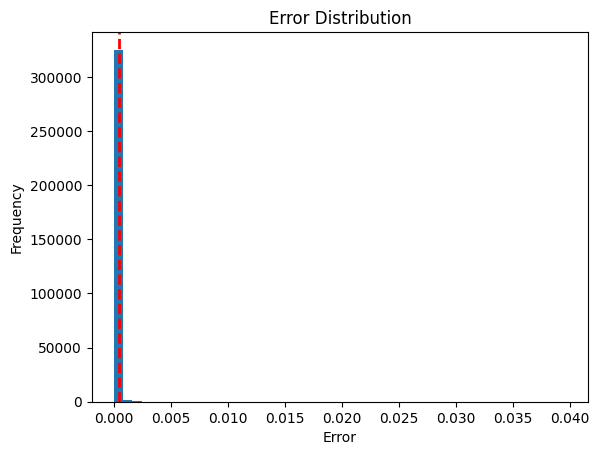

In [26]:
plt.hist(r_error.numpy(), bins = 50)
plt.axvline(threshold.numpy(), color = 'red', linestyle='--', linewidth=2)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

Get and show the anomalies detected

In [27]:
anomaly_indices = anomalies.numpy().flatten()

print(" first 5 anomalies detected:\n")
print(df_selected.iloc[anomaly_indices[:5]])

 first 5 anomalies detected:

     month origin dest  arr_delay  dep_delay  distance  air_time
69       1    JFK  LAX       44.0        2.0      2475     381.0
151      1    JFK  BWI      851.0      853.0       184      41.0
162      1    JFK  HNL      -14.0       -3.0      4983     659.0
215      1    EWR  LAX       39.0       32.0      2454     346.0
237      1    JFK  SFO       32.0       -1.0      2586     389.0


compare normal data and the anomalies

In [28]:
normal_data = df_selected.iloc[~df_selected.index.isin(anomaly_indices)]
anomalies_data = df_selected.iloc[anomaly_indices]

print("Stats from Normal Data:\n")
print(normal_data.describe())

print("\nStats from Anomalies Data:\n")
print(anomalies_data.describe())

Stats from Normal Data:

               month      arr_delay      dep_delay       distance  \
count  321116.000000  321116.000000  321116.000000  321116.000000   
mean        6.565070       6.815198      12.496500    1048.084552   
std         3.411637      44.542389      39.978524     735.731203   
min         1.000000     -86.000000     -33.000000      80.000000   
25%         4.000000     -17.000000      -5.000000     509.000000   
50%         7.000000      -5.000000      -2.000000     888.000000   
75%        10.000000      14.000000      11.000000    1389.000000   
max        12.000000    1272.000000    1301.000000    4983.000000   

            air_time  
count  321116.000000  
mean      150.633478  
std        93.652915  
min        20.000000  
25%        82.000000  
50%       129.000000  
75%       191.000000  
max       695.000000  

Stats from Anomalies Data:

             month    arr_delay    dep_delay     distance     air_time
count  6433.000000  6433.000000  6433.000000  

show on a Dispersion plot

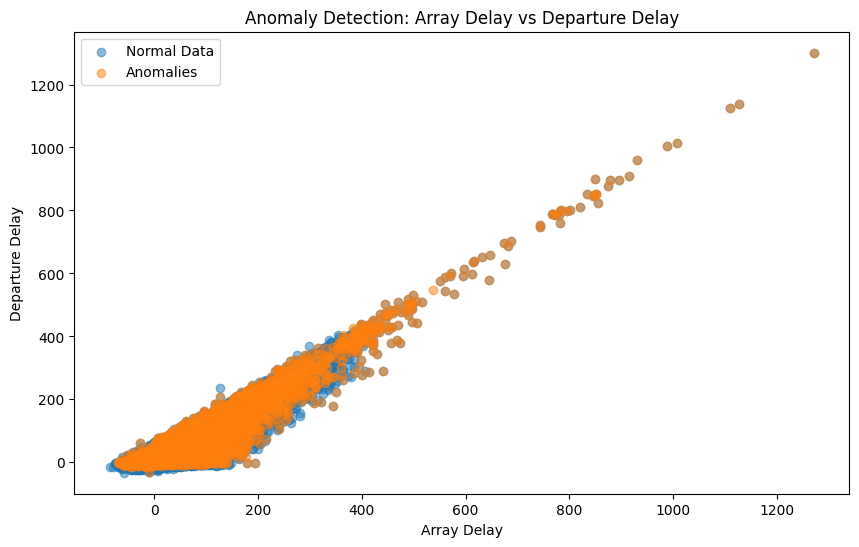

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['arr_delay'], normal_data['dep_delay'], label='Normal Data', alpha = 0.5)
plt.scatter(anomalies_data['arr_delay'], anomalies_data['dep_delay'], label='Anomalies', alpha = 0.5)

plt.xlabel('Array Delay')
plt.ylabel('Departure Delay')
plt.title('Anomaly Detection: Array Delay vs Departure Delay')
plt.legend()
plt.show()

